# Week 9 & 10 Quiz

## Zichen Zhao - zz3119

### Due Mon. Dec 2nd, 11:59pm

This quiz has two sections. In section 1, we'll practice scaling data and using PCA for dimensionality reduction.
In section 2, we focus on NLP and TF-IDF methods.  

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

# PART 1

In [25]:
!pip install scikit-learn==1.3.2 --force-reinstall

  Using cached scikit_learn-1.3.2-cp39-cp39-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp39-cp39-macosx_12_0_arm64.whl (9.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninst

### Load Standard Libraries

In [26]:
# Import numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set matplotlib to display inline
%matplotlib inline

### Load the Dataset

In [27]:
# Import load_breast_cancer from sklearn.datasets
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset using the load_breast_cancer() function.
# Store in the variable 'cancer'.
cancer = load_breast_cancer()

# Create a new dataframe X with values from cancer.data (which is stored as a numpy array)
#    and with columns named using cancer.feature_names (also a numpy array)
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)

# For this quiz, only keep the first 10 features/columns
# Store the result back into X
X = X.iloc[:,:10]

# Assert that the shape of the dataframe is (569,10): 569 rows, 10 columns
assert X.shape == (569,10)

In [28]:
# Display the dataframe
print(X.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  
0                 0.07871  
1                 0.05667  
2       

### Calculate Summary Stats

In [29]:
# The distribution of features in this dataset vary quite a bit, affecting PCA performance.
# To get a sense of the difference, display the mean and standard deviation of each feature.
# Use the .agg() function, which takes a list of strings describing the functions to apply.
# Call .agg() on X
#   with the function names 'mean' and 'std' 
#   transpose the dataframe using .T or .transpose()
#   and round to a precision of 2
summary_stats = X.agg(['mean','std']).T.round(2)
summary_stats

,mean,std
mean radius,14.13,3.52
mean texture,19.29,4.30
mean perimeter,91.97,24.30
mean area,654.89,351.91
mean smoothness,0.10,0.01
mean compactness,0.10,0.05
mean concavity,0.09,0.08
mean concave points,0.05,0.04
mean symmetry,0.18,0.03
mean fractal dimension,0.06,0.01


###  Standardize the Data

In [30]:
# Standardize the data to mean 0, standard deviation of 1 using sklearn StandardScaler

#Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# To standardize X use StandardScaler with default settings
#  do a fit_transform() on X
#  store in X_zscore
scaler = StandardScaler()
X_zscore = scaler.fit_transform(X)

# Add feature names by creating a new DataFrame
#  containing X_zscore
#  with the same column names as the original dataframe X
#  store back into X_zscore
X_zscore = pd.DataFrame(X_zscore, columns=X.columns)

# assert that the mean is near 0 and standard deviation is near 1 for all standardized features
assert X_zscore.mean().round(2).eq(0).all() and X_zscore.std().round(2).eq(1).all()

# To visually confirm that all features have been standardized:
# Call .agg() on X_zscore
#   with the function names 'mean' and 'std' 
#   transpose the dataframe using .T or .transpose()
#   and round to a precision of 2
summary_stats_zscore = X_zscore.agg(['mean','std']).T.round(2)
summary_stats_zscore

,mean,std
mean radius,-0.0,1.0
mean texture,-0.0,1.0
mean perimeter,-0.0,1.0
mean area,-0.0,1.0
mean smoothness,0.0,1.0
mean compactness,-0.0,1.0
mean concavity,-0.0,1.0
mean concave points,0.0,1.0
mean symmetry,-0.0,1.0
mean fractal dimension,-0.0,1.0


### Show Variance Described by PCA

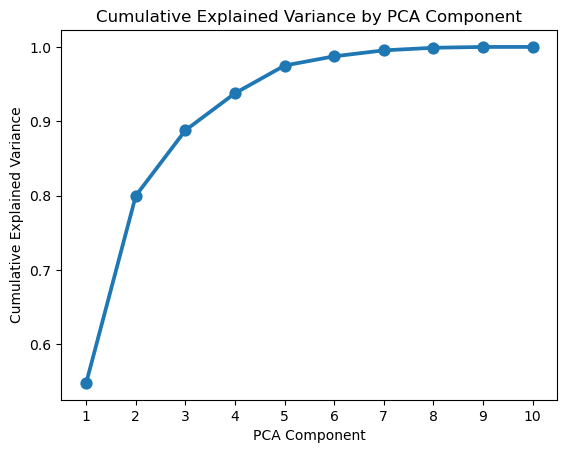

In [31]:
# Import PCA from sklearn.
from sklearn.decomposition import PCA

# Fit a PCA model to X_zscore using PCA() with default parameters
#   and store in pca
pca = PCA()
pca.fit(X_zscore)

# Create a new DataFrame with 2 columns:
#   "component" with values 0 to the number of components in pca
#   "cumulative explained variance" with the .cumsum() of the explained_variance_ratio_ in pca
#   store in df_var
df_var = pd.DataFrame({'component': range(1, len(pca.explained_variance_ratio_) + 1),
                      'cumulative explained variance': pca.explained_variance_ratio_.cumsum()})

# Use sns.pointplot() to plot the data from df_var with
#   "component" on the x-axis
#   "cumulative explained variance" on the y-axis
sns.pointplot(x='component', y='cumulative explained variance', data=df_var)
plt.title ('Cumulative Explained Variance by PCA Component')
plt.xlabel ('PCA Component')
plt.ylabel ('Cumulative Explained Variance')
plt.show()

# Note that over 55% of the variance is explained by the first component
# Over 80% by the first 2 components
# Over 90% by the first 4 components

### Transform Dataset using First 2 Components

In [32]:
# Fit and transform X_zscore using a new PCA model with n_components=2
# Store the transformed dataset in X_pca
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_zscore)

# Add feature names by creating a new DataFrame
#  containing X_pca
#  with the column names ['component0','component1']
#  store back into X_pca
X_pca = pd.DataFrame(X_pca, columns=['component0','component1'])

# Assert that the pca representation has the same number of rows (569) but now 2 columns
assert X_pca.shape == (569,2)
X_pca.head()

,component0,component1
0,5.224155,3.204428
1,1.728094,-2.540839
2,3.969757,-0.550075
3,3.596713,6.905070
4,3.151092,-1.358072


### Plot the Reduced Representation

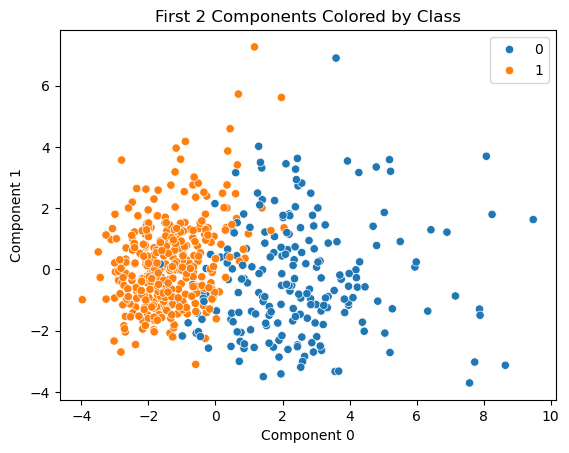

In [33]:
# Using seaborn, create a scatterplot of the data in X_pca
#  with component0 on the x-axis
#  and component1 on the y-axis
#  Color the points by their class assignment by setting hue=cancer.target
#  Capture the returned axis in ax
ax = sns.scatterplot(x=X_pca['component0'], y=X_pca['component1'], hue=cancer.target)

# Set the title to 'First 2 Components Colored by Class' using ax
ax.set_title('First 2 Components Colored by Class')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

# Note that we haven't used the cancer.target information to generate the pca representation.
# We're coloring by cancer.target here to demonstrate that under this transformation
#   a linear model will do a decent job of separating the classes

# PART 2

### Load the Dataset

In [34]:
# Import fetch_20newsgroups from sklearn.datasets
from sklearn.datasets import fetch_20newsgroups

# Load the dataset using fetch_20newsgroups().
#   Only fetch the two categories of interest using categories=['sci.space','rec.autos']
# Store in the result into newsgroups
newsgroups = fetch_20newsgroups(categories=['sci.space','rec.autos'])

# Store the newsgroups.data as docs, newsgroups.target as y and newsgroups.target_names as y_names
docs = newsgroups.data
y = newsgroups.target
y_names = newsgroups.target_names

# Print the number of observations by printing the length of docs
#  You should get 1187
len(docs)

1187

In [35]:
# Print the text of the first document in docs.
# Note: try printing both with and without the print() statement
#  with the print statement, linebreaks are parsed,
#  without, linebreaks are printed as excape characters
print("with print():")
print(docs[0])

print("\nwithout print():")
docs[0]

with print():
From: prb@access.digex.com (Pat)
Subject: Re: Proton/Centaur?
Organization: Express Access Online Communications USA
Lines: 15
NNTP-Posting-Host: access.digex.net


Well thank you dennis for your as usual highly detailed and informative 
posting.   

The question i have about the proton, is  could it be  handled at
one of KSC's spare pads, without major  malfunction,  or could it be
handled at kourou  or Vandenberg?   

Now if it uses storables,  then  how long would it take for the russians
to equip something at cape york?

If  Proton were launched from a western site,  how would it compare to the
T4/centaur?   As i see it, it should lift  very close to the T4.

pat


without print():


"From: prb@access.digex.com (Pat)\nSubject: Re: Proton/Centaur?\nOrganization: Express Access Online Communications USA\nLines: 15\nNNTP-Posting-Host: access.digex.net\n\n\nWell thank you dennis for your as usual highly detailed and informative \nposting.   \n\nThe question i have about the proton, is  could it be  handled at\none of KSC's spare pads, without major  malfunction,  or could it be\nhandled at kourou  or Vandenberg?   \n\nNow if it uses storables,  then  how long would it take for the russians\nto equip something at cape york?\n\nIf  Proton were launched from a western site,  how would it compare to the\nT4/centaur?   As i see it, it should lift  very close to the T4.\n\npat\n"

In [36]:
# Print the target value of the first document in y.
print(f"The target value of the first document in y is {y[0]}")

The target value of the first document in y is 1


In [37]:
# Print the target_name of the first document using y_names and y.
print(f"Target name of the first document: {y_names[y[0]]}")

Target name of the first document: sci.space


### Use CountVectorizer to Convert To TF

In [51]:
# Import CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object. It should
#   lowercase all text, 
#   include both unigrams and bigrams: ngram_range=(1,2)
#   exclude terms that occur in fewer than 10 documents: min_df=10
#   exclude terms that occur in more than 95% of documents: max_df=.95
# Store as cvect
cvect = CountVectorizer(lowercase=True, ngram_range=(1,2), min_df=10, max_df=.95)

# Fit cvect on docs and transform docs into their term frequency representation.
# Store as X_tf
X_tf = cvect.fit_transform(docs)

# Print the shape of X_tf. 
# The number of rows should match the number of documents above
#  and the number of columns should be near 6000
print(X_tf.shape)

(1187, 5893)


In [52]:
# Print out the last 5 terms in the learned vocabulary in cvect
#   using .get_feature_names_out() which returns a list of terms corresponding
#   to the order of the columns in X_tf
# They should all be related to zoos or zoology
vocab = cvect.get_feature_names_out()
print(vocab[-5:])

['zoo' 'zoo toronto' 'zoology' 'zoology kipling' 'zoology lines']


In [54]:
if hasattr(cvect, 'stop_words_'):
    stop_words_list = list(cvect.stop_words_)
    print(stop_words_list[:5])
else:
    print("No stopwords were identified by CountVectorizer.")

No stopwords were identified by CountVectorizer.


In [40]:
# The stopwords learned by cvect are stored as a set in cvect.stop_words_
# We'd like to print out a small subset of these terms.
# One way to get a subset of a set is to treat it as a list.
# First, convert the stop_words_ set to a list.
# Store as stop_words_list
stop_words_list = list(cvect.stop_words_)

# Print out the first 5 elements in stop_words_list.
# Note that, since a set is unordered, 
#  there is no meaning to the ordering of these terms and they may vary over runs.
print(stop_words_list[:5])

AttributeError: 'CountVectorizer' object has no attribute 'stop_words_'

### Calculate Mean CV Accuracy Using RandomForestClassifier

In [16]:
# Import cross_val_score from sklearn
from sklearn.model_selection import cross_val_score

# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Get a set of 5-fold CV scores using
#  a RandomForestClassifier 
#   with 50 trees 
#   and n_jobs=-1 all other settings default
#   and the full dataset X_tf and y
# Store as cv_scores
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
cv_scores = cross_val_score(clf, X_tf, y, cv=5)

# Print the mean of these cv_scores rounded to a precision of 2.
#  The mean accuracy should be above .9
mean_cv_score = round(cv_scores.mean(), 2)
print(f"Mean CV Score: {mean_cv_score}")

Mean CV Score: 0.97


### Optional: Find Important Features

In [17]:
# CountVectorizer stores the feature names (terms in the vocabulary) in two ways:
#  1. as a dictionary of term:colum_index pairs, accessed via cvect.vocabulary_
#  2. as a list of terms, in column index order, accessed via cvect.get_feature_names_out()
#
# We can get the indices of the most important features by training a new RandomForestClassifier on X_tf,y
#  and accessing .feature_importances_
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
clf.fit(X_tf, y)
feature_importances = clf.feature_importances_
feature_names = cvect.get_feature_names_out()

# Using some combination of the above data-structures, 
#  print out the top 10 terms in the vocabulary
#  ranked by the feature importances learned by a RandomForestClassifier with 50 trees
importances_df = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
top_features = importances_df.sort_values("importance", ascending=False).head(10)
print(top_features)
# The terms you find will likely not be surprising given the document categories.

       feature  importance
4463     space    0.043084
1011       car    0.040152
1039      cars    0.017982
3278      nasa    0.017713
3196      moon    0.013581
2804    launch    0.013451
3611     orbit    0.012547
3280  nasa gov    0.011555
4814   the car    0.009347
1475     digex    0.008793
